<a href="https://colab.research.google.com/github/ShlokArora2709/Mentorness/blob/main/ModelDeployement/Meentorness2_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Copy of Salary Prediction of Data Professions.csv")
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [ ]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [ ]:
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2631 non-null   object 
 1   LAST NAME         2631 non-null   object 
 2   SEX               2631 non-null   object 
 3   DOJ               2631 non-null   object 
 4   CURRENT DATE      2631 non-null   object 
 5   DESIGNATION       2631 non-null   object 
 6   AGE               2631 non-null   float64
 7   SALARY            2631 non-null   int64  
 8   UNIT              2631 non-null   object 
 9   LEAVES USED       2631 non-null   float64
 10  LEAVES REMAINING  2631 non-null   float64
 11  RATINGS           2631 non-null   float64
 12  PAST EXP          2631 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 287.8+ KB


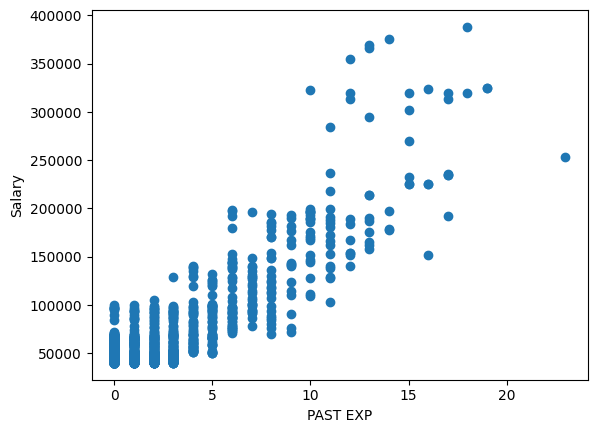

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.scatter(df['PAST EXP'],df['SALARY'])
plt.xlabel('PAST EXP')
plt.ylabel('Salary')
plt.figure(figsize=(10,6))
plt.show()

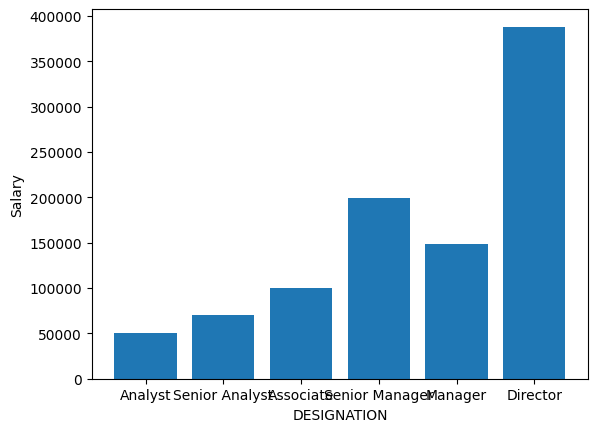

<Figure size 2000x600 with 0 Axes>

In [ ]:
plt.bar(df['DESIGNATION'],df['SALARY'])
plt.xlabel('DESIGNATION')
plt.ylabel('Salary')
plt.figure(figsize=(20,6))
plt.show()

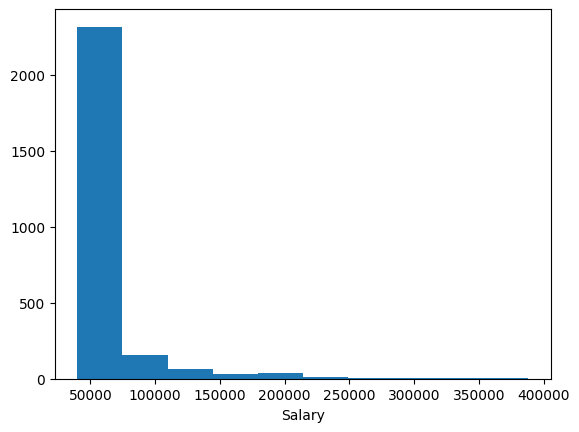

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.hist(df['SALARY'])
plt.xlabel('Salary')
plt.figure(figsize=(10,6))
plt.show()

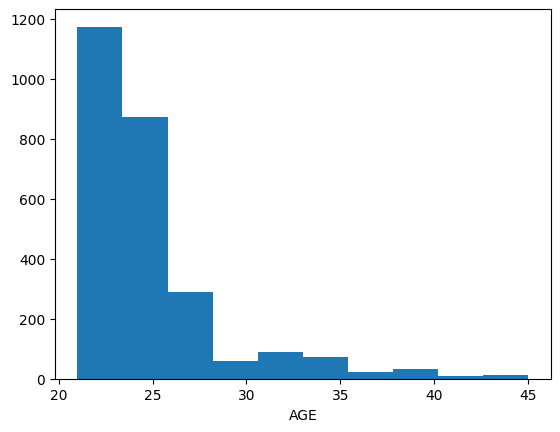

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.hist(df['AGE'])
plt.xlabel('AGE')
plt.figure(figsize=(10,6))
plt.show()

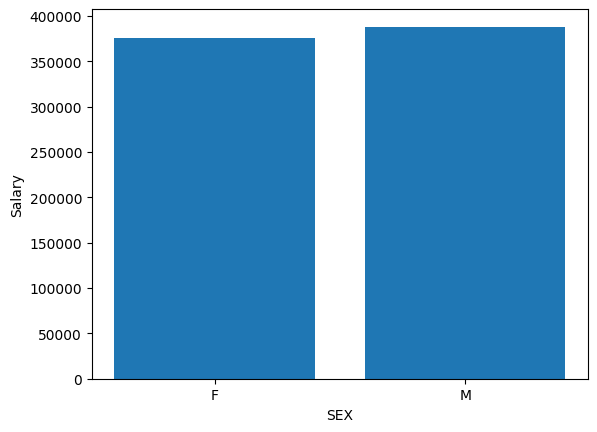

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.bar(df['SEX'],df['SALARY'])
plt.xlabel('SEX')
plt.ylabel('Salary')
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['Current Experience (Years)'] = (df['CURRENT DATE'] - df['DOJ']).dt.days // 365
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Current Experience (Years)
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,4
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,1


In [ ]:
df['TOTAL EXPERIENCE'] = df['Current Experience (Years)'] + df['PAST EXP']
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Current Experience (Years),TOTAL EXPERIENCE
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1,1
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1,1
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2,2
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2,2
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,4,14
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1,1
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1,1
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,1,2


In [ ]:
df['DAYS WITH COMPANY'] = (df['CURRENT DATE'] - df['DOJ']).dt.days
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Current Experience (Years),TOTAL EXPERIENCE,DAYS WITH COMPANY
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1,1,599
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1,1,528
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2,2,1009
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2,2,857
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,1,2,557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,4,14,1654
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1,1,723
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1,1,714
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,1,2,661


In [ ]:
df.nunique()

FIRST NAME                    2359
LAST NAME                     2469
SEX                              2
DOJ                            965
CURRENT DATE                     1
DESIGNATION                      6
AGE                             25
SALARY                        2299
UNIT                             6
LEAVES USED                     16
LEAVES REMAINING                16
RATINGS                          4
PAST EXP                        21
Current Experience (Years)       7
TOTAL EXPERIENCE                25
DAYS WITH COMPANY              965
dtype: int64

In [ ]:
categorical_vars = ['SEX', 'DESIGNATION', 'UNIT', 'RATINGS', 'Current Experience (Years)','PAST EXP']

for var in categorical_vars:
    groups = [df[df[var] == level]['SALARY'] for level in df[var].unique()]
    f_val, p_val = f_oneway(*groups)
    print(f"ANOVA results for {var}:")
    print(f"F-statistic: {f_val}, p-value: {p_val}")
    print("\n")

ANOVA results for SEX:
F-statistic: 2.142665721222379, p-value: 0.1433723288439244


ANOVA results for DESIGNATION:
F-statistic: 10924.796170390098, p-value: 0.0


ANOVA results for UNIT:
F-statistic: 0.7277483531617359, p-value: 0.6025721587857858


ANOVA results for RATINGS:
F-statistic: 0.7893896422243339, p-value: 0.4997032787496609


ANOVA results for Current Experience (Years):
F-statistic: 233.88746581334033, p-value: 8.318470122069678e-240


ANOVA results for PAST EXP:
F-statistic: 575.6205021290308, p-value: 0.0




In [ ]:
correlation_matrix = df[['AGE', 'LEAVES USED', 'TOTAL EXPERIENCE', 'DAYS WITH COMPANY', 'LEAVES REMAINING','SALARY']].corr()
correlations = correlation_matrix['SALARY']
correlations

AGE                  0.871929
LEAVES USED          0.006850
TOTAL EXPERIENCE     0.887031
DAYS WITH COMPANY    0.434990
LEAVES REMAINING    -0.006850
SALARY               1.000000
Name: SALARY, dtype: float64

In [ ]:
relevant_columns = ['AGE', 'TOTAL EXPERIENCE', 'DAYS WITH COMPANY', 'SALARY','DESIGNATION','Current Experience (Years)','PAST EXP']
df = df[relevant_columns]
df

,AGE,TOTAL EXPERIENCE,DAYS WITH COMPANY,SALARY,DESIGNATION,Current Experience (Years),PAST EXP
0,21.0,1,599,44570,Analyst,1,0
2,21.0,1,528,40955,Analyst,1,0
3,22.0,2,1009,45550,Analyst,2,0
6,22.0,2,857,40339,Analyst,2,0
8,28.0,2,557,63478,Senior Analyst,1,1
...,...,...,...,...,...,...,...
2634,36.0,14,1654,185977,Senior Manager,4,10
2635,23.0,1,723,45758,Analyst,1,0
2636,21.0,1,714,47315,Analyst,1,0
2637,24.0,2,661,45172,Analyst,1,1


In [ ]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
numeric_features = ['AGE', 'DAYS WITH COMPANY','TOTAL EXPERIENCE', 'Current Experience (Years)', 'PAST EXP']
categorical_features = ['DESIGNATION']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features[:-3]),
        ('cat', encoder, categorical_features)
    ], remainder='passthrough')
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(df.drop(columns=['SALARY']))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['AGE', 'DAYS WITH COMPANY']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['DESIGNATION'])]))])

In [ ]:
sal_scaler=MinMaxScaler()
sal_scaler.fit(df[['SALARY']])

MinMaxScaler()

In [ ]:
X = df.drop(columns=['SALARY'])
y = df['SALARY']

X=pipeline.transform(X)
y=sal_scaler.transform(y.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}
X,y

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(array([[0.        , 0.11732606, 1.        , ..., 1.        , 1.        ,
         0.        ],
        [0.        , 0.08503865, 1.        , ..., 1.        , 1.        ,
         0.        ],
        [0.04166667, 0.30377444, 1.        , ..., 2.        , 2.        ,
         0.        ],
        ...,
        [0.        , 0.16962256, 1.        , ..., 1.        , 1.        ,
         0.        ],
        [0.125     , 0.14552069, 1.        , ..., 2.        , 1.        ,
         1.        ],
        [0.125     , 0.06139154, 1.        , ..., 3.        , 1.        ,
         2.        ]]),
 array([[0.01312512],
        [0.00274051],
        [0.01594032],
        ...,
        [0.02101054],
        [0.01485446],
        [0.02635654]]))

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': round(rmse, 5),
        'MSE': round(mse, 5),
        'MAE': round(mae, 5),
        'R2 Score': round(r2, 5)
    }


<ipython-input-112-24ef541520a3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [ ]:
for name, metrics in results.items():
    print(f"Metrics for {name}:")
    print(f"  RMSE: {metrics['RMSE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  R2 Score: {metrics['R2 Score']*100}%")
    print()

Metrics for Linear Regression:
  RMSE: 0.01971
  MSE: 0.00039
  MAE: 0.01153
  R2 Score: 96.23899999999999%

Metrics for Random Forest Regressor:
  RMSE: 0.02562
  MSE: 0.00066
  MAE: 0.01291
  R2 Score: 93.644%

Metrics for XGBoost Regressor:
  RMSE: 0.02644
  MSE: 0.0007
  MAE: 0.01289
  R2 Score: 93.23%



In [ ]:
model=models['Linear Regression']

In [ ]:
new_data = pd.DataFrame([[30, 348, 4, 2, 2, 'Director']])
new_data.columns = ['AGE',  'DAYS WITH COMPANY','TOTAL EXPERIENCE',  'Current Experience (Years)', 'PAST EXP','DESIGNATION']
td=pipeline.transform(new_data)
y_pred= model.predict(td)
y_pred_tf= sal_scaler.inverse_transform(y_pred)
y_pred_tf

array([[283455.8719902]])

In [ ]:
joblib.dump(model, 'salary_prediction_model.pkl')
joblib.dump(sal_scaler, 'salary_scaler.pkl')
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']